ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **19Apr20**

# Laboratory Work 12 (21Apr20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

---
### Table of Contents<a id="toc"></a>
* [Assignment 1 (50 pts)](#a1) Pyrolysis of ethyl nitrite in a closed reactor vessel.
 - [1.1)](#a11) Rank of the stoichiometric matrix.
 - [1.2)](#a12) Compute and report the equilibrium mole fractions in the reactor.
 - [1.3)](#a13) Plot all normalized extention of reaction roots.
 - [1.4)](#a14) Summary of key computational steps.
* [Assignment 2 (50 pts)](#a2) Sigmoid curve fit to COVID-19 data around the world.
 - [2.1)](#a21) Min. max. of the sigmoid model, maximum growth rate and time for maximum growth.
 - [2.2)](#a22) Plot the cumulative deaths in Canada
 - [2.3)](#a23) Compute the best parameters for the sigmoid model.
 - [2.4)](#a24) Plot the fit, compute maximum growth and date for maximum growth, and compute the relative error. Explain errors.
 - [2.5)](#a25) Repeat the foregoing analysis for the top 10 countries leading the number of cumulative deaths in the world.
 - [2.6)](#a26) Comment on the usefulness of this data fitting for communication with your neighbors and friends.
---

## <span style="color:blue">Use the material covered in Notebook 15.</span>

## <span style="color:blue">Assignment 1 (50 pts): For each item below respond in a separate notebook cell.</span><a id="a1"></a>

<span style="color:blue">
    
Find the equilibrium molar fraction for a model of the pyrolysis of ethyl nitrite in a closed reactor vessel: see file `data/ethyl-nitrite-rxn.txt`:
</span>

 Pyrolysis mechanism          |         $K_x$        |
--------------------------------------|----------------------|
C2H5ONO      <=> C2H5O   + NO   | 5.02e+00        |
C2H5O        <=> CH3     + CH2O | 3.23e+00        |
C2H5O + NO   <=> CH3CHO  + HNO  | 2.12e+00        |
C2H5O + HNO  <=> C2H5OH  + NO   | 3.65e+00        |
2 NOH        <=> N2O     + H2O  | 1.45e-01   |
CH3 + NO     <=> CH3NO          | 1.67e+00     |
CH3NO        <=> CH2=NOH        | 1.09e-00   |
CH2=NOH      <=> HCN     + H2O  | 1.14e-01   |

where $K_x$ the reaction equilibrium constant based on molar fraction.
</span>

<span style="color:blue">
At some point in time, the charge to the reactor vessel was given:
</span>

| Species | Empirical Formula | Mole Fraction | Value [%] |
|-------------|-----------------|--------------|-------|
|.     | C2H5ONO | $x_\text{C2H5ONO}$ |  90   |
|.      | C2H5O   | $x_\text{C2H5O}$   | 1  |
|. | NO      | $x_\text{NO}$      | 1   |
|.    | CH3     | $x_\text{CH3}$     | 0.5  |
|.      | CH2O    | $x_\text{CH2O}$    | 0.5     |
|.      | CH3CHO  | $x_\text{CH3CHO}$  | 1  |
|.          | HNO     | $x_\text{HNO}$     | 0.5      |
|.           | C2H5OH  | $x_\text{C2H5OH}$  | 1      |
|.| NOH     | $x_\text{NOH}$     | 0.5      |
|.      | N2O     | $x_\text{N2O}$     | 1      |
|.             | H2O     | $x_\text{H2O}$     | 1   |
|.         | CH3NO   | $x_\text{CH3NO}$   | 1      |
|.      | CH2=NOH | $x_\text{CH2=NOH}$ | 0.5   |
|.  | HCN     | $x_\text{HCN}$     | 0.5      |

In [1]:
'''Create as many cells as needed to organize the algorithms'''


'Create as many cells as needed to organize the algorithms'

[<span style="color:blue">1.1)</span>](#toc)
<span style="color:blue">
What is the rank of the stoichiometric matrix. Is it full rank? Or rank deficient? Justify your answer.
</span><a id="a11"></a>

**Rank-realated answers:** 

[<span style="color:blue">1.2)</span>](#toc)
<span style="color:blue">
Compute and report the equilibrium mole fractions for all species as follows (values are for your reference):
    
      formula      species name 
        xxxx         name         = 2.870e-01 (28.70%)
        xxxx         name         = 1.732e-01 (17.32%)
        xxxx         name         = 1.394e-01 (13.94%)
        xxxx         name         = 7.470e-02 (7.47%)
        xxxx         name         = 7.173e-02 (7.17%)
        xxxx         name         = 6.985e-02 (6.98%)
        xxxx         name         = 6.089e-02 (6.09%)
        xxxx         name         = 4.395e-02 (4.39%)
        xxxx         name         = 4.032e-02 (4.03%)
        xxxx         name         = 1.590e-02 (1.59%)
        xxxx         name         = 1.239e-02 (1.24%)
        xxxx         name         = 1.002e-02 (1.00%)
        xxxx         name         = 4.274e-04 (0.04%)
        xxxx         name         = 2.086e-04 (0.02%)
       
       
</span><a id="a12"></a>

In [19]:
'''1.2) Find root and equilibrium molar fractions'''





**********************************************************
               Newton's Method Iterations                 
**********************************************************
k | |K(e_k)|  | |K'(e_k)| | |del e_k| |   |e_k|   | convg|
----------------------------------------------------------
 1  +6.237e+00  +1.540e+03  +1.775e-01  +6.216e-01 0.00
 2  +5.068e+00  +9.866e+02  +1.610e-01  +7.797e-01 1.06
 3  +4.028e+00  +6.769e+02  +8.803e-02  +8.530e-01 1.33
 4  +3.875e+00  +5.050e+02  +7.125e-02  +8.750e-01 1.09
 5  +3.846e+00  +4.026e+02  +8.424e-02  +9.077e-01 0.94
 6  +3.828e+00  +3.527e+02  +8.992e-02  +9.478e-01 0.97
 7  +3.764e+00  +3.627e+02  +8.797e-02  +9.908e-01 1.01
 8  +3.582e+00  +4.567e+02  +8.334e-02  +1.032e+00 1.02
 9  +3.193e+00  +7.019e+02  +8.713e-02  +1.070e+00 0.98
10  +2.659e+00  +1.218e+03  +1.088e-01  +1.110e+00 0.91
11  +1.929e+00  +2.032e+03  +1.368e-01  +1.163e+00 0.90
12  +8.329e-01  +3.033e+03  +1.092e-01  +1.212e+00 1.11
13  +1.011e-01  +4.272e+03  +4.

[<span style="color:blue">1.3)</span>](#toc)
<span style="color:blue">
Plot all normalized extention of reaction roots:   
</span><a id="a13"></a>

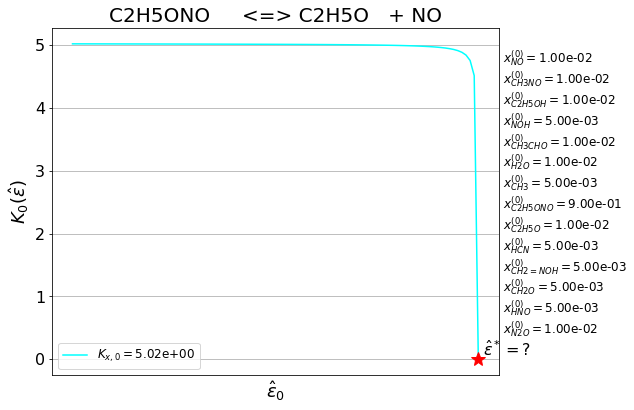

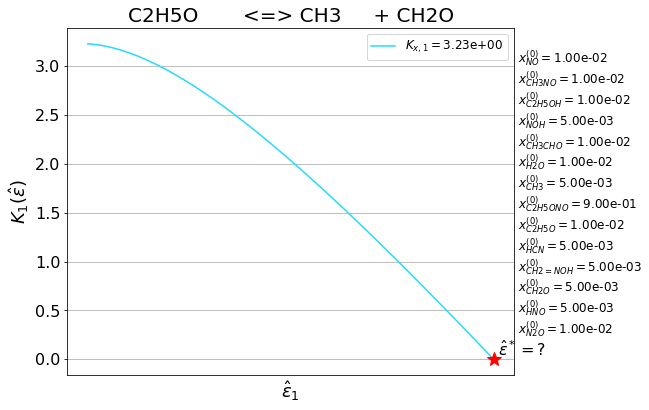

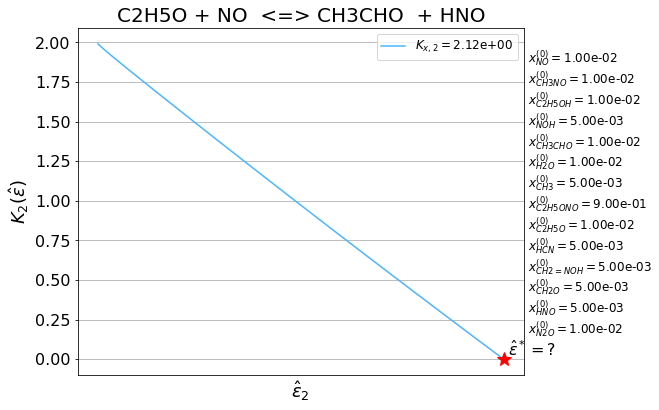

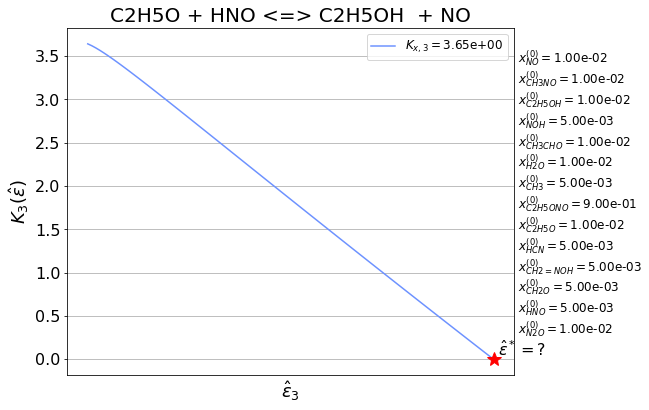

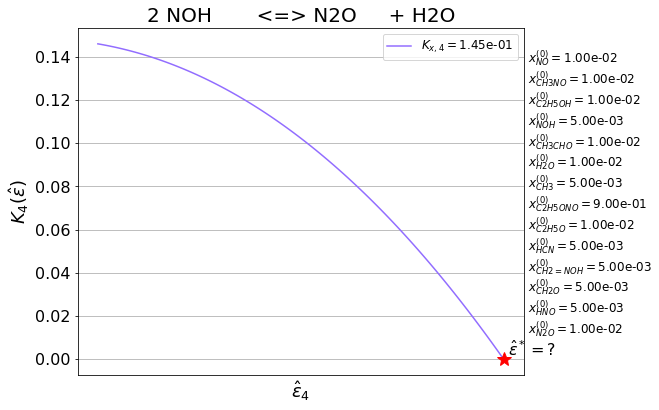

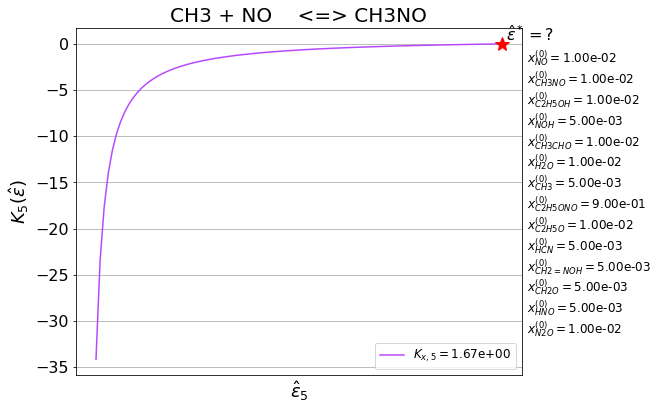

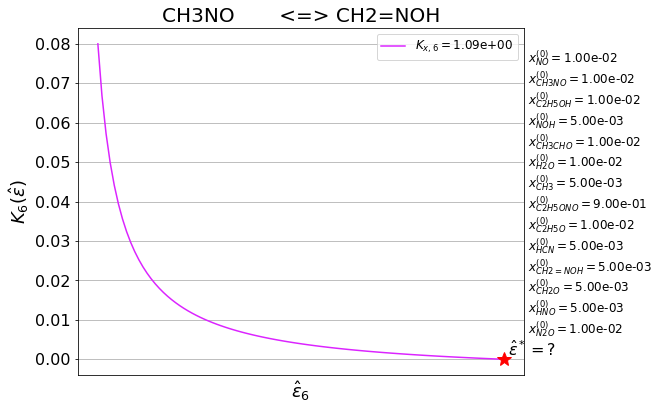

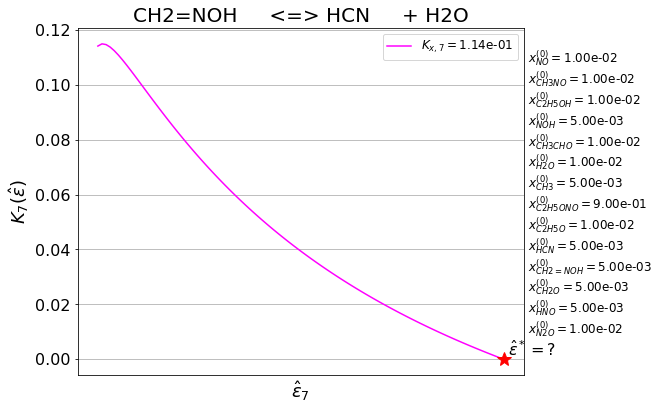

In [25]:
'''1.3) Plot equilibrium vector function'''


[<span style="color:blue">1.4)</span>](#toc)
<span style="color:blue">
Summary of key computational steps needed to solve the problem.   
</span><a id="a14"></a>

**Key computation steps:**


## <span style="color:blue">Use the material covered in Notebook 17.</span>

## <span style="color:blue">Assignment 2 (50 pts): For each item below respond in a separate notebook cell.</span><a id="a2"></a>

## <span style="color:blue">Introduction</span>

<span style="color:blue">
Use the non-linear least-squares method to compute the best parameters, $\alpha_0$ and $\alpha_1$, and $\alpha_2$ for the sigmoid model
</span>

    
\begin{equation*}
\boxed{ f(t) = \frac{\alpha_0}{1 + \alpha_1\, e^{\alpha_2\,t} } }
\end{equation*}
   

<span style="color:blue">
that approximates the given COVID-19 data $f(t)$ for $t \ge 0$. Note that $\alpha_2 \le 0$.
</span>

[<span style="color:blue">2.1)</span>](#toc)
<span style="color:blue">
What are the minimum and maximum values of $f(t)$? Derive the formula for the time, $t_\text{max}$, at which the maximum growth rate occurs. Derive the formula for the maximum growth rate. 
</span><a id="a21"></a>

**Min., max.:** 

**Time at max. growth:**  

**Max. growth rate:** 

[<span style="color:blue">2.2)</span>](#toc)
<span style="color:blue">
Plot the COVID-19 cumulative deaths in Canada
</span><a id="a22"></a>

In [26]:
'''2.2) Get data per country'''

from chen_3170.help import get_covid_19_global_data

case_type = 'deaths'
(country_names, dates, cases) = get_covid_19_global_data(type=case_type,cumulative=True)

In [27]:
'''2.2) Get Canada data for times when cases are non-zero'''

import numpy as np

country = 'Canada'
assert country in country_names, 'State: %r not in %r'%(country,country_names)
country_id = country_names.index(country)
(nz_cases_ids,) = np.where(cases[:,country_id]>0)
country_cases = cases[nz_cases_ids,country_id]
country_dates = dates[nz_cases_ids]

In [28]:
'''2.2) Select data up until a given date'''

date = None # set end date wanted

if date is not None:
    assert isinstance(date,str)
    (id,) = np.where(country_dates==date)
    assert id.size == 1
    country_dates = np.copy(country_dates[:id[0]+1])
    country_cases = np.copy(country_cases[:id[0]+1])

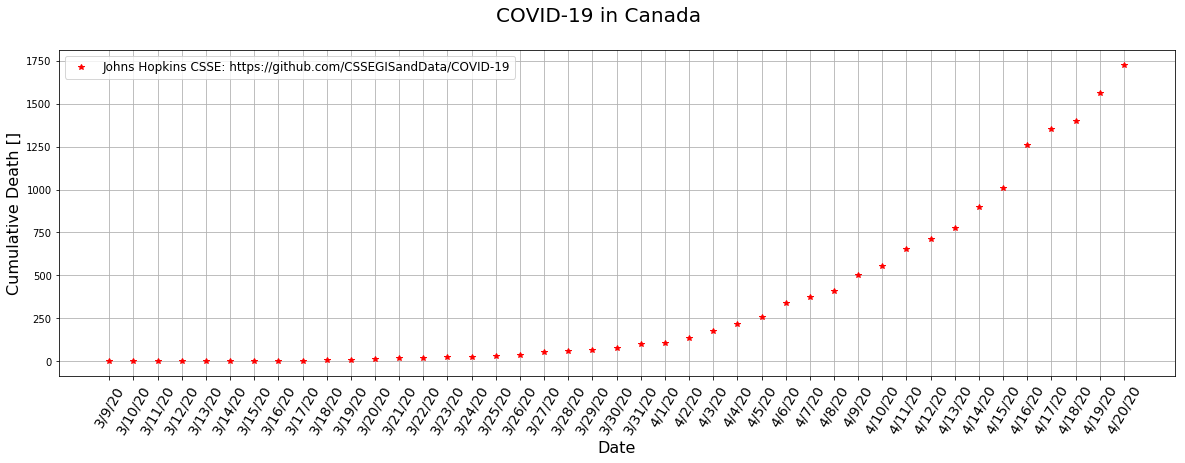

Last 5 days # of cumulative cases = [1257. 1354. 1399. 1563. 1725.]


In [29]:
'''2.2) Plot data'''


[<span style="color:blue">2.3)</span>](#toc)
<span style="color:blue">
Compute the best parameters for the sigmoid model. Use your answers in [2.1](#a21) to guess the initial values of parameters $\alpha_0$ and $\alpha_1$. Use a guess of $\alpha_2 = -0.1$.
</span><a id="a23"></a>

In [31]:
'''2.3) Compute best parameters for sigmoid model'''




******************************************************
          Newton's Method Iterations                  
******************************************************
k | |r(p_k)| |  |J(p_k)| | |del p_k| |  |p_k|  |convg|
------------------------------------------------------
 1 +2.699e+03 +2.797e+04 +1.138e+04  +1.035e+03   0.40
 2 +6.928e+02 +2.506e+04 +2.597e+03  +3.627e+03   0.84
 3 +3.254e+02 +9.014e+04 +7.799e+02  +3.204e+03   0.85
 4 +1.490e+02 +8.769e+04 +1.230e+02  +3.285e+03   0.72
 5 +1.483e+02 +8.653e+04 +3.498e+01  +3.316e+03   0.74
 6 +1.483e+02 +8.683e+04 +1.455e+00  +3.317e+03   0.11
 7 +1.483e+02 +8.685e+04 +2.891e-02  +3.317e+03  -9.45
 8 +1.483e+02 +8.685e+04 +1.921e-03  +3.317e+03   1.77
 9 +1.483e+02 +8.685e+04 +1.013e-04  +3.317e+03   1.47
10 +1.483e+02 +8.685e+04 +4.788e-05  +3.317e+03   1.08
11 +1.483e+02 +8.685e+04 +2.263e-05  +3.317e+03   1.08
12 +1.483e+02 +8.685e+04 +2.225e-05  +3.317e+03   1.00
13 +1.483e+02 +8.685e+04 +1.221e-06  +3.317e+03   1.27
14 +1.48

[<span style="color:blue">2.4)</span>](#toc)
<span style="color:blue">
Plot the fit, compute the maximum growth rate, and the date when it occurred. Compute the error of the fit.
</span><a id="a24"></a>

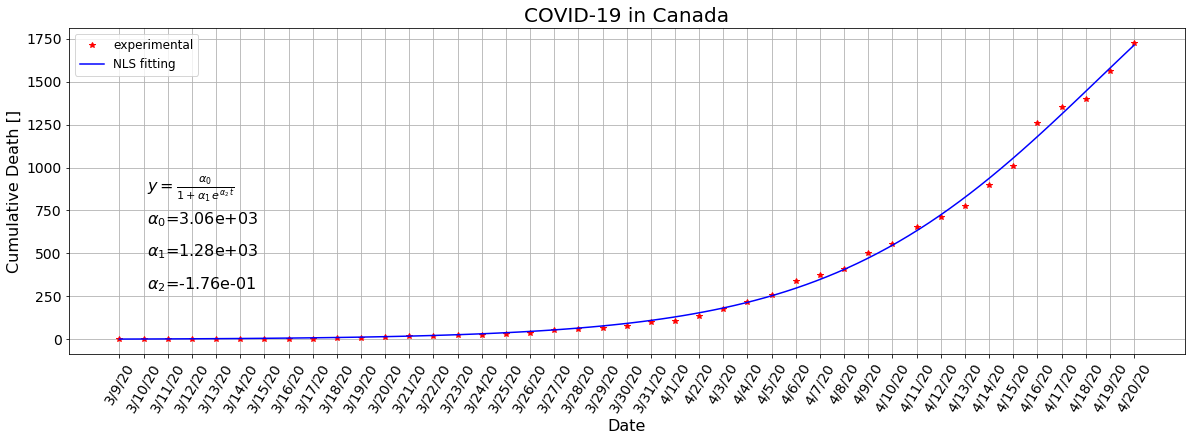

In [32]:
'''2.4) Plot the fit'''


In [33]:
'''2.4) Maximum growth and date for maximum growth'''



Maximum growth rate    = 1.35e+02 [death/day]
Date at maximum growth = 4/19/20 


In [34]:
'''2.4) Error analysis'''


mean relative error [%] = 68.20
std  relative error [%] = 132.90
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  3.66
std  relative error [%] =  2.88


[<span style="color:blue">2.5)</span>](#toc)
<span style="color:blue">
Repeat the foregoing analysis for the top 10 countries leading the number of cumulative deaths in the world.
</span><a id="a25"></a>

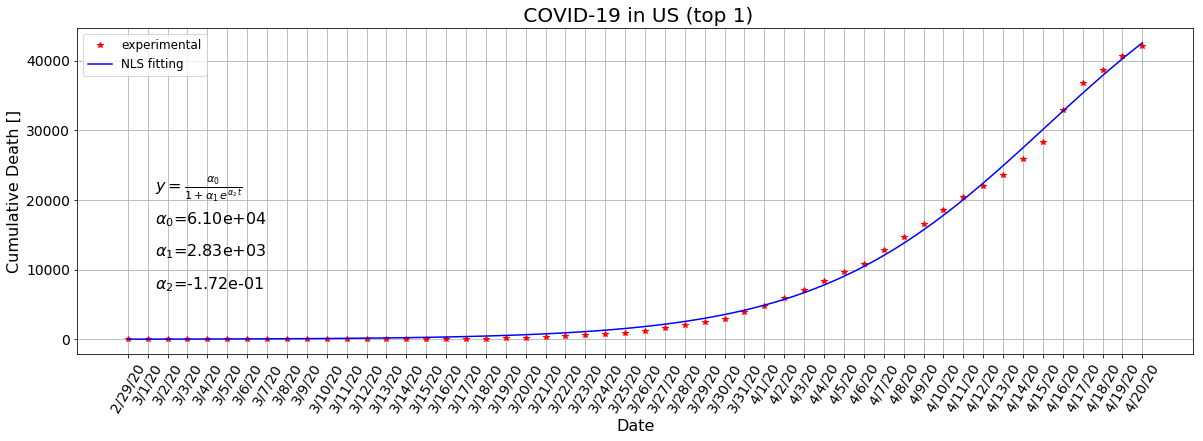

Last 5 days # of cumulative cases = [32916. 36773. 38664. 40661. 42094.]

Maximum growth rate    = 2.628e+03 [death/day]
Date at maximum growth = 4/16/20 

mean relative error [%] = 216.18
std  relative error [%] = 434.42
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] = 17.16
std  relative error [%] = 25.75


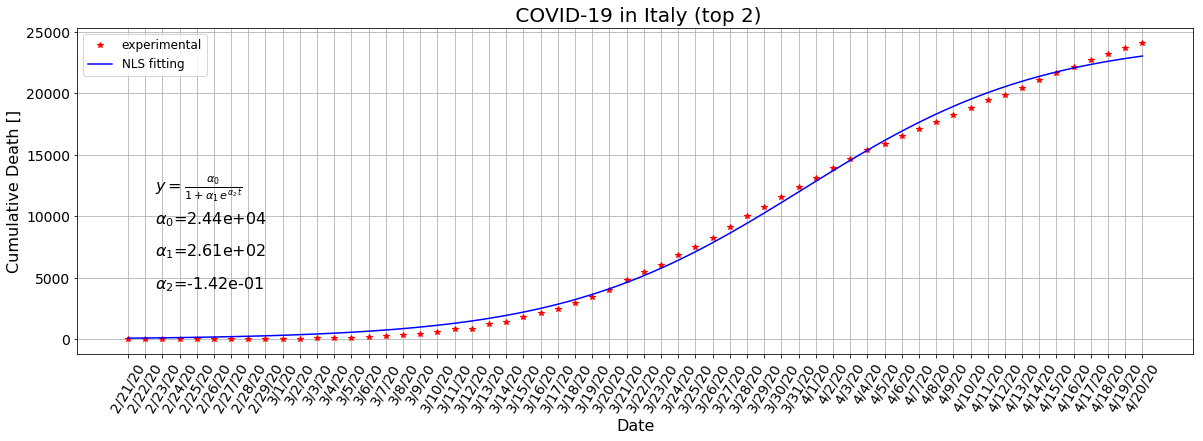

Last 5 days # of cumulative cases = [22170. 22745. 23227. 23660. 24114.]

Maximum growth rate    = 8.660e+02 [death/day]
Date at maximum growth = 4/1/20 

mean relative error [%] = 506.82
std  relative error [%] = 1454.88
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] = 10.98
std  relative error [%] = 19.15


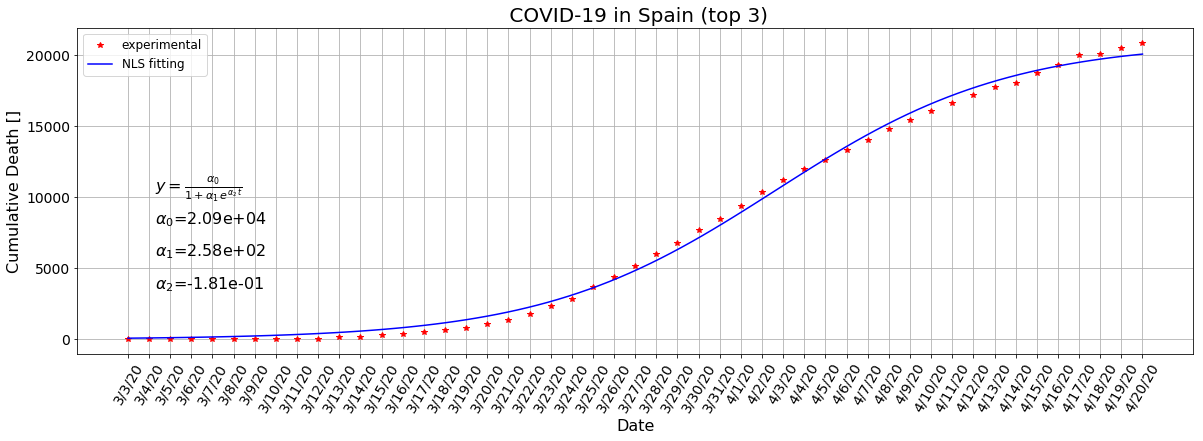

Last 5 days # of cumulative cases = [19315. 20002. 20043. 20453. 20852.]

Maximum growth rate    = 9.480e+02 [death/day]
Date at maximum growth = 4/3/20 

mean relative error [%] = 523.69
std  relative error [%] = 1426.65
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] = 13.59
std  relative error [%] = 23.13


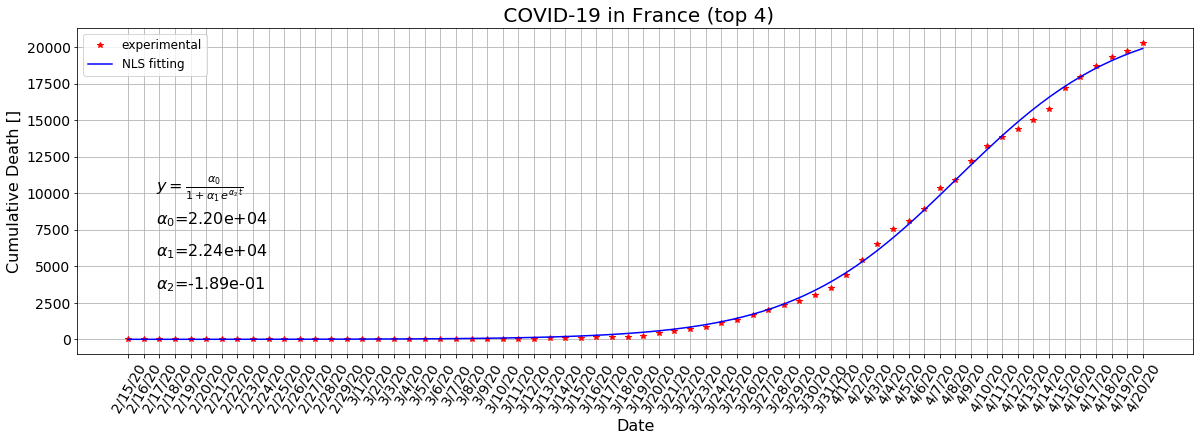

Last 5 days # of cumulative cases = [17941. 18703. 19345. 19744. 20292.]

Maximum growth rate    = 1.038e+03 [death/day]
Date at maximum growth = 4/9/20 

mean relative error [%] = 145.97
std  relative error [%] = 194.67
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  5.62
std  relative error [%] =  6.29


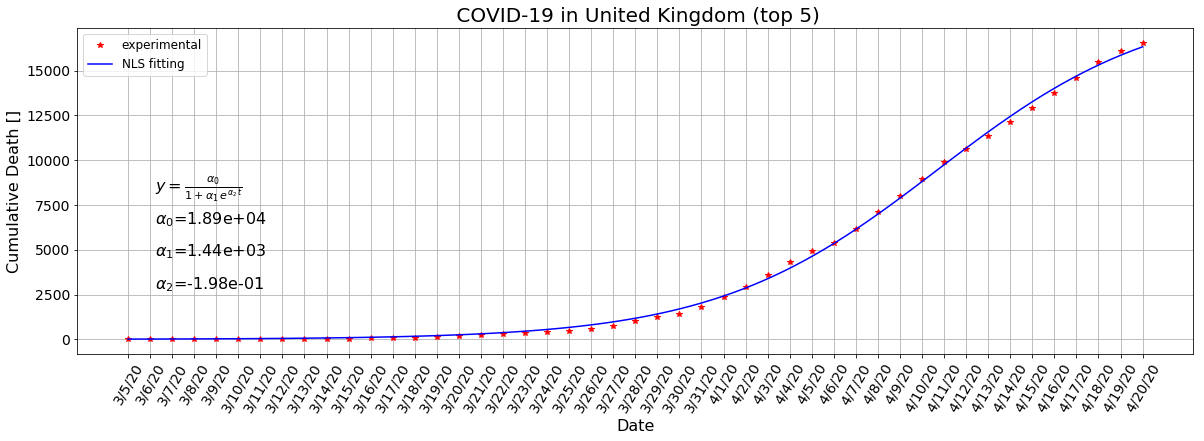

Last 5 days # of cumulative cases = [13759. 14607. 15498. 16095. 16550.]

Maximum growth rate    = 9.366e+02 [death/day]
Date at maximum growth = 4/11/20 

mean relative error [%] = 165.30
std  relative error [%] = 285.50
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  6.87
std  relative error [%] =  9.52


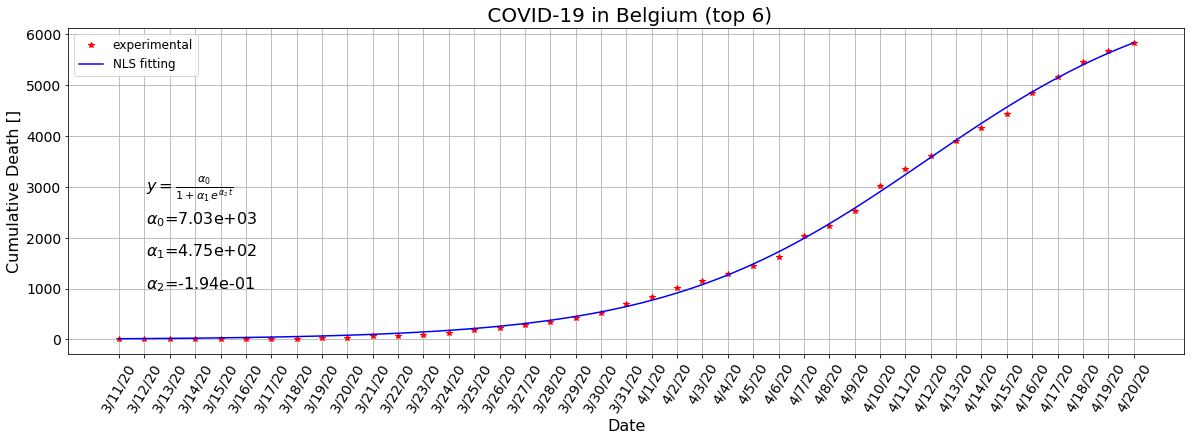

Last 5 days # of cumulative cases = [4857. 5163. 5453. 5683. 5828.]

Maximum growth rate    = 3.405e+02 [death/day]
Date at maximum growth = 4/12/20 

mean relative error [%] = 118.01
std  relative error [%] = 209.16
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  3.03
std  relative error [%] =  2.67


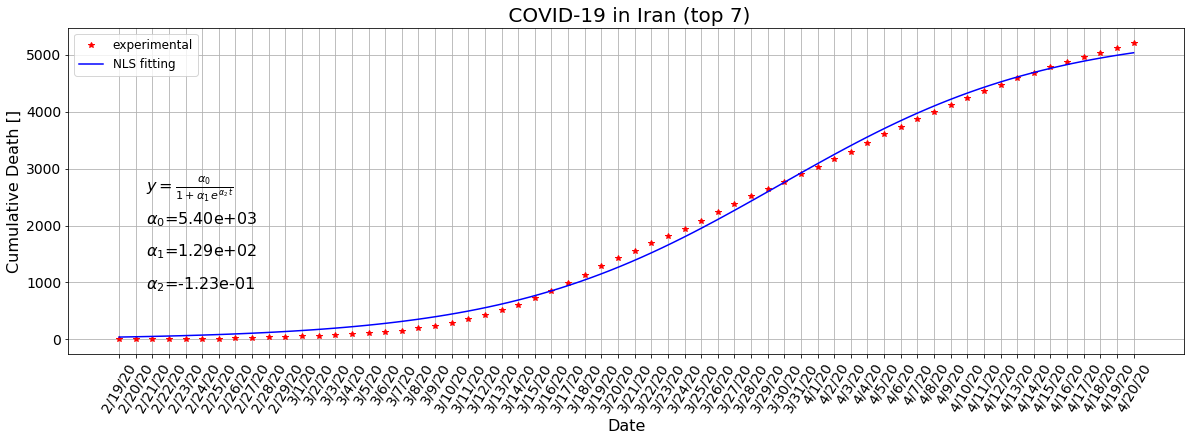

Last 5 days # of cumulative cases = [4869. 4958. 5031. 5118. 5209.]

Maximum growth rate    = 1.655e+02 [death/day]
Date at maximum growth = 3/30/20 

mean relative error [%] = 176.81
std  relative error [%] = 427.14
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  4.44
std  relative error [%] =  4.35


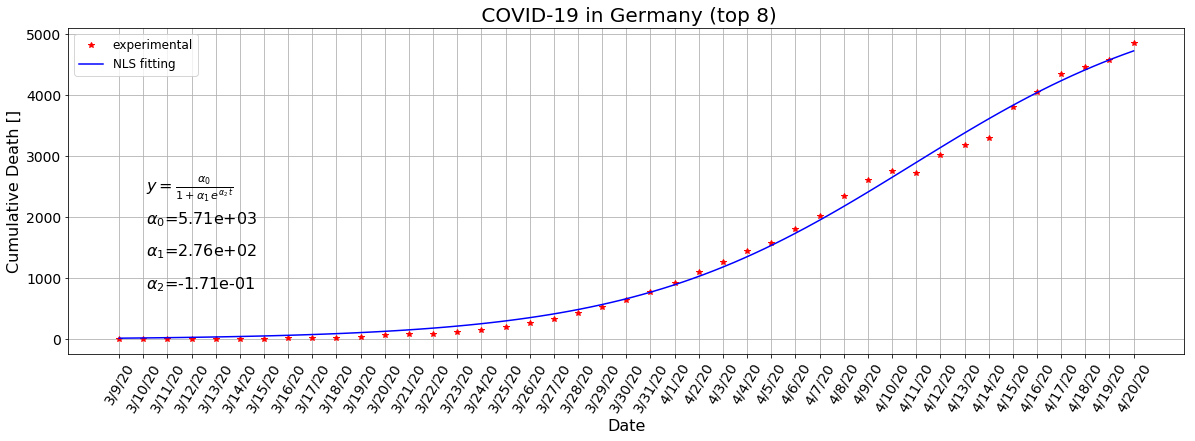

Last 5 days # of cumulative cases = [4052. 4352. 4459. 4586. 4862.]

Maximum growth rate    = 2.445e+02 [death/day]
Date at maximum growth = 4/11/20 

mean relative error [%] = 159.90
std  relative error [%] = 295.24
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  4.10
std  relative error [%] =  2.70


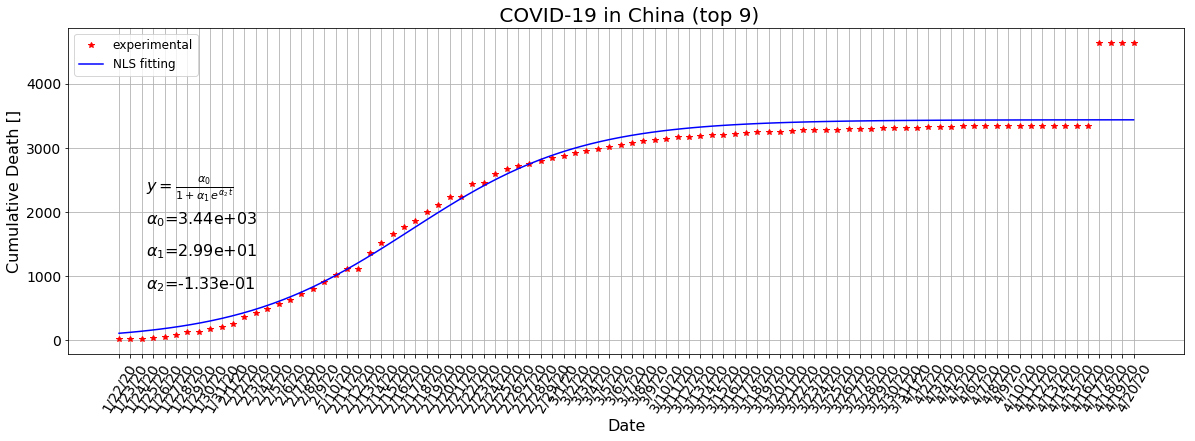

Last 5 days # of cumulative cases = [3346. 4636. 4636. 4636. 4636.]

Maximum growth rate    = 1.142e+02 [death/day]
Date at maximum growth = 2/17/20 

mean relative error [%] = 34.08
std  relative error [%] = 103.42
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  4.95
std  relative error [%] =  5.21


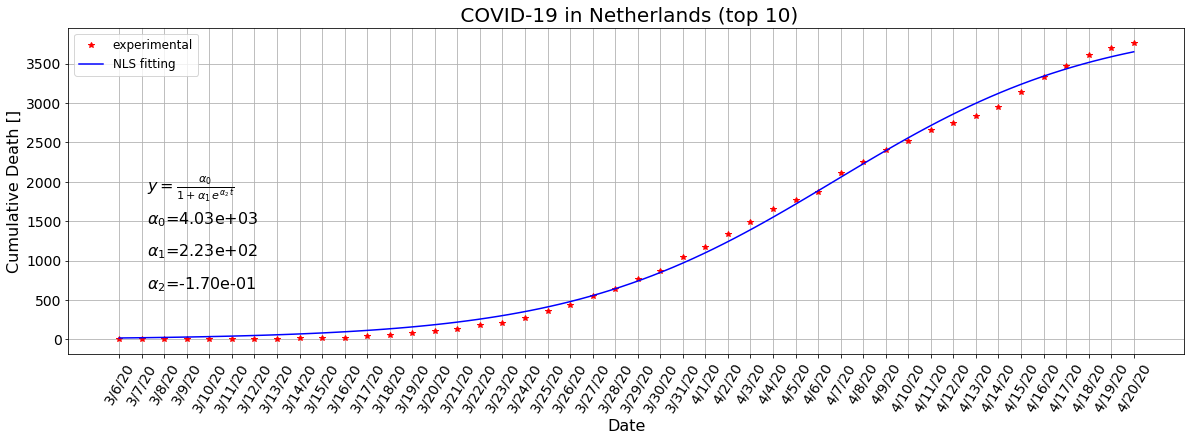

Last 5 days # of cumulative cases = [3327. 3471. 3613. 3697. 3764.]

Maximum growth rate    = 1.717e+02 [death/day]
Date at maximum growth = 4/7/20 

mean relative error [%] = 219.66
std  relative error [%] = 437.23
discard dates with relatively small number of cases: min(500,0.1*max(country_cases))
mean relative error [%] =  3.55
std  relative error [%] =  2.57


In [36]:
'''2.5) Top 10 countries leading cumulative deaths'''



[<span style="color:blue">2.6)</span>](#toc)
<span style="color:blue">
Comment on the usefulness of this data fitting for communication with your neighbors and friends.
</span><a id="a26"></a>

**Comments:**